## Clasificación de imágenes usando CONVNETS
### Alex Hdz
### Mayo 26

### Objetivo
Desarrollar un modelo de reconocimiento de imágenes que permita clasificar distintos tipos de imágenes  utilizando redes convolucionales.


### Datos
Utilizaremos el dataset CIFAR10 que viene incluida dentro de la librería/paquete de Keras.

Este dataset tiene 50,000 32 x 32 imágenes a color para el set de entrenamiento y 10,000 imágenes a color para el set de pruebas. Los labels corresponden a las siguientes 10 categorias:

0=airplane,
1=automobile,
2=bird,
3=cat,
4=deer,
5=dog,
6=frog,
7=horse,
8=ship y
9=truck

Recordemos que los pixeles pueden tomar valores entre 0 y 255. 

### Redes neuronales convolucionales

Las redes neuronales son modelos que permiten la extracción de features de los datos mediante filtros.

La primera capa de una red neuronal extrae todos los pixeles de la imagen y cuando esta información se incorpora en la red neuronal, se aplican diferentes filtros a la imagen formando diferentes representaciones de la imagen o parte de ésta.

Este proceso de extraer features de la imagen se logra con un filtro convolucional lo que le da el nombre a esta clase de modelos como redes neuronales convolucionales.

Usualmente el proceso para crear una red neuronal convolucional involucra 5 pasos:

1. Convolución.

2. Pooling.

3. Flattening.





#### Convolución 
Las convoluciones consisten en tomar grupos de pixeles cercanos de la imagen e ir realizando productos escalares contra una pequeña matriz que se llama kernel. Ese kernel, que en nuestro modelo es de 3×3 pixeles, recorre todas las neuronas de entrada de izquierdaa derecha, de arriba a abajo y genera una nueva matriz de salida.

En este paso tambièn realizamos la activación. La función de activación más utilizada para este tipo de redes neuronales es la llamada ReLu por Rectifier Linear Unit  y se define como sigue: $f(x)=max(0,x)$.

#### Pooling

Despues de que los datos fueron activados, se ingresa a una capa de pooling que toma la información de la imagen y la "comprime" haciéndola más pequeña. Este proceso permite que la red tenga más flexibilidad y que tenga mejor capacidad para reconocer features relevantes. Se podría decir que sirve para eliminar todos los features no relevantes de la imagen. Este proceso permite evitar overfitting. Asimismo, sirve para reuducir el numero de neuronas, de tal forma que sea un problema manejable.

Existen diversas formas de realizar el pooling, siendo el max pooling la más utilizada. Max pooling obtiene el máximo número de pixeles en un sólo filtro, lo anterior tomando en cuenta cierta fracción de la imagen.

#### Flattening

Esta capa permite que la información sea "planchada" de las capas densamente conectadas a un vector para su procesamiento. En otras palabras, los valores se comprimen en un vector o columna largo.





### Especificación del modelo

Para la construcción de la red neuronal convolucional utilizaremos TensorFlow como bakend y Keras como API utilizando Python.

A continuación se describe a detalles toda la especificación del modelo.

Importamos los paquetes y librerías que vamos a utilizar.

In [2]:
import tensorflow as tf
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import itertools

Leemos el dataset que como comenté previamente viene en la libreríad de Keras y asignamos nuestra muestra de entrenamiento y de test:

In [3]:
cifar10 = tf.keras.datasets.cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

Notemos cual es la dimensión de nuestros conjuntos de entrenamiento y de pruebas:

In [7]:
print(x_train.shape)
print(x_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)


Y echemos un vistazo a los datos. Recordemos que los pixeles toman valores de 0 a 255:

In [12]:
x_train[1]

array([[[154, 177, 187],
        [126, 137, 136],
        [105, 104,  95],
        ...,
        [ 91,  95,  71],
        [ 87,  90,  71],
        [ 79,  81,  70]],

       [[140, 160, 169],
        [145, 153, 154],
        [125, 125, 118],
        ...,
        [ 96,  99,  78],
        [ 77,  80,  62],
        [ 71,  73,  61]],

       [[140, 155, 164],
        [139, 146, 149],
        [115, 115, 112],
        ...,
        [ 79,  82,  64],
        [ 68,  70,  55],
        [ 67,  69,  55]],

       ...,

       [[175, 167, 166],
        [156, 154, 160],
        [154, 160, 170],
        ...,
        [ 42,  34,  36],
        [ 61,  53,  57],
        [ 93,  83,  91]],

       [[165, 154, 128],
        [156, 152, 130],
        [159, 161, 142],
        ...,
        [103,  93,  96],
        [123, 114, 120],
        [131, 121, 131]],

       [[163, 148, 120],
        [158, 148, 122],
        [163, 156, 133],
        ...,
        [143, 133, 139],
        [143, 134, 142],
        [143, 133, 144]]

Asimismo, veamos que nuestros labels van de 0 a 9


In [15]:
y_test

array([[3],
       [8],
       [8],
       ...,
       [5],
       [1],
       [7]], dtype=uint8)

Finalmente, veamos como se ve una de las imagenes:

[9]


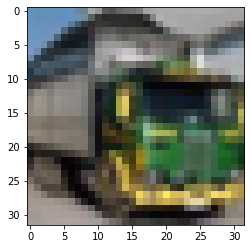

In [17]:
plt.imshow(x_train[14])
print(y_train[14])

Hacemos algo de preprocesamiento

In [26]:
y_train = y_train.flatten()
y_test = y_test.flatten()


classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

input_shape = (32, 32, 3)

x_train=x_train.reshape(x_train.shape[0], x_train.shape[1], x_train.shape[2], 3)
x_train=x_train / 255.0
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], x_test.shape[2], 3)
x_test=x_test / 255.0


y_train = tf.one_hot(y_train.astype(np.int32), depth=10)
y_test = tf.one_hot(y_test.astype(np.int32), depth=10)

In [27]:
#Realizamos las inicializaciones
batch_size = 32
num_classes = 10
epochs = 10


model = tf.keras.models.Sequential([ # Hay dos formas de inicializar una red neuronal, secuencial y gáfica. Usaremos secuencial
    tf.keras.layers.Conv2D(32, 3, padding='same', input_shape=x_train.shape[1:], activation='relu'), # Añadimos una capa convolucional con 32 filtros (cada filtro de tamaño 3x3)
    tf.keras.layers.Conv2D(32, 3, activation='relu'), #utilizamos activación relu
    tf.keras.layers.MaxPooling2D(), # Hacemos pooling
    tf.keras.layers.Dropout(0.25),

    tf.keras.layers.Conv2D(64, 3, padding='same', activation='relu'),
    tf.keras.layers.Conv2D(64, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Dropout(0.25),

    tf.keras.layers.Flatten(), # Notemos que al final siempre hacemos un flatten de los datos 
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(num_classes, activation='softmax'),# Asimismo, hacemos que el numero de neuronas sea igual al numero de clases (en este caso 10) 
]) # Usamos softmax para que seleccionemos la neurona con mayor probabilidad como output.

Ahora procedemos a compilar el modelo, utiliando 10 epochs y el optimizador Adam:

In [28]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-03, decay=1e-06/epochs),
            loss='categorical_crossentropy', metrics=['acc'])

Ajustamos el modelo:

In [29]:
model.fit(x_train, y_train, batch_size=batch_size,
                    epochs=epochs)

Train on 50000 samples
Epoch 1/10
50000/50000 [==============================] - 264s 5ms/sample - loss: 1.5096 - acc: 0.4527
Epoch 2/10
50000/50000 [==============================] - 261s 5ms/sample - loss: 1.0926 - acc: 0.6131
Epoch 3/10
50000/50000 [==============================] - 264s 5ms/sample - loss: 0.9459 - acc: 0.6694
Epoch 4/10
50000/50000 [==============================] - 264s 5ms/sample - loss: 0.8600 - acc: 0.6968
Epoch 5/10
50000/50000 [==============================] - 265s 5ms/sample - loss: 0.8016 - acc: 0.7199
Epoch 6/10
50000/50000 [==============================] - 267s 5ms/sample - loss: 0.7544 - acc: 0.7378
Epoch 7/10
50000/50000 [==============================] - 271s 5ms/sample - loss: 0.7159 - acc: 0.7520
Epoch 8/10
50000/50000 [==============================] - 271s 5ms/sample - loss: 0.6836 - acc: 0.7627
Epoch 9/10
50000/50000 [==============================] - 270s 5ms/sample - loss: 0.6562 - acc: 0.7716
Epoch 10/10
50000/50000 [=========================

Nos queda una accuracy del 76% en el set de pruebas:

In [30]:
test_loss, test_acc = model.evaluate(x_test, y_test)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

Graficamos la matriz de confusion:


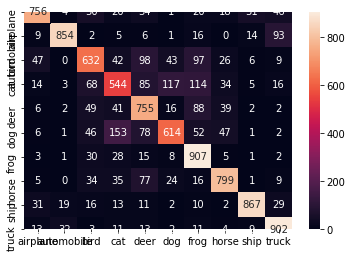

In [43]:
confusion = tf.math.confusion_matrix(np.argmax(y_test,axis = 1), np.argmax(model.predict(x_test),axis=1))
confusion_graph=sns.heatmap(confusion_mtx, annot=True, fmt='g').set(xticklabels=classes, yticklabels=classes)